In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
FILE_NAME = 'takens_1.txt'

In [3]:
def read_data(file_name):
    """
    Reads data inside the file named file_name.
    """
    x1 = []
    x2 = []
    t = []
    with open(file_name) as f:
        lines = f.readlines()
        count = 0
        for line in lines:
            x1_t, x2_t = map(float, line.split(' '))
            x1.append(x1_t)
            x2.append(x2_t)
            t.append(count)
            count += 1
    return x1, x2, t

x1, x2, t = read_data(FILE_NAME)

# Part One

## Plot x1 against time

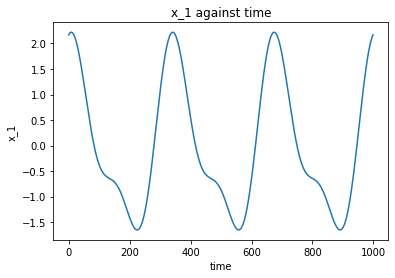

In [4]:
plt.plot(t, x1)
plt.title('x_1 against time')
plt.xlabel('time')
plt.ylabel('x_1')
plt.show()

## Plot x_1 against x_2

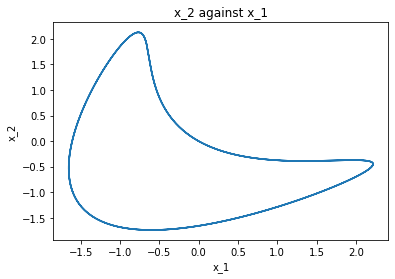

In [5]:
plt.plot(x1, x2)
plt.title('x_2 against x_1')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

In [6]:
delta_n = [1, 2, 5, 10, 20, 50, 75, 100, 150]

all_x1_delayed = []
all_x2_delayed = []
all_time = []

for each_delta_n in delta_n:
    x1_delayed = []
    x2_delayed = []
    time = []
    for i in range(len(x1)//each_delta_n):
        x1_delayed.append(x1[each_delta_n*i])
        x2_delayed.append(x2[each_delta_n*i])
        time.append(t[i])
    all_x1_delayed.append(x1_delayed)
    all_x2_delayed.append(x2_delayed)
    all_time.append(time)

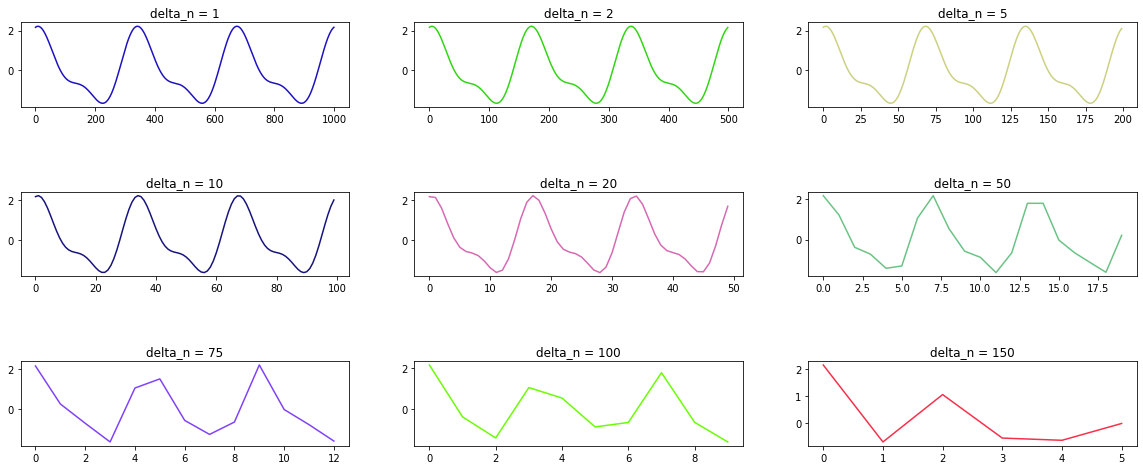

In [7]:
fig, axis = plt.subplots(3, 3, figsize=(20, 6))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.2)

for i in range(len(delta_n)):
    axis[i//3][i%3].set_title(f'delta_n = {delta_n[i]}')
    axis[i//3][i%3].plot(all_time[i], all_x1_delayed[i], c=np.random.rand(3,))
plt.show()


Picked delta_n = 20.

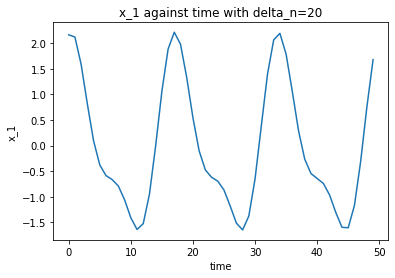

In [8]:
plt.plot(all_time[4], all_x1_delayed[4])
plt.title('x_1 against time with delta_n=20')
plt.xlabel('time')
plt.ylabel('x_1')
plt.show()

## How many coordinates do you need to plot to be sure that the periodic manifold is embedded correctly?

It is given in the description: The two columns are the two coordinates of a closed, one-dimensional manifold. Note: the manifold is one-dimensional, because it can be mapped locally to a one-dimensional Euclidean space.

Since it can be mapped locally to a one-dimensional Euclidean space, we can accept d=1 in the Takens' theorem. So that, we would need `2*d+1=3 ` coordinates to embed manifold correctly. Which could be stated as:
`E(x) = (y(x), y(phi(x)), y(phi(phi(x))))`

# Part Two

In [9]:
# Imports
from utils import *
from lorenz import *
%matplotlib inline

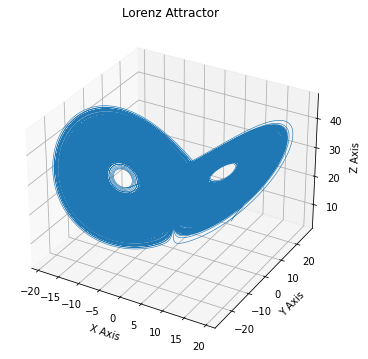

In [10]:
lorenz_x, lorenz_y, lorenz_z = get_trajectory(x_0=10.0, plot=True)

# Visualization

## Compute x2 = x(t + ∆t) and x3 = x(t + 2∆t)

In [11]:
def generate_lorenz_data(axis, delta_t):
    """
    Generates data x_1 = x(t), x2 = x(t+delta_t), x3 = (t + 2*delta_t) then returns it.
    """
    if axis == 'x': all_data = lorenz_x
    elif axis == 'y': all_data = lorenz_y
    else: all_data = lorenz_z

    lorenz_data1 = []
    lorenz_data2 = []
    lorenz_data3 = []

    for each_delta_t in delta_t:
        lorenz_data1_temp = []
        delayed_data2 = []
        delayed_data3 = []
        for time in range(len(all_data) - 2*each_delta_t):
            lorenz_data1_temp.append(all_data[time])
            delayed_data2.append(all_data[time+each_delta_t])
            delayed_data3.append(all_data[time+2*each_delta_t])
        lorenz_data1.append(lorenz_data1_temp)
        lorenz_data2.append(delayed_data2)
        lorenz_data3.append(delayed_data3)

    return lorenz_data1, lorenz_data2, lorenz_data3

In [12]:
delta_t = [10, 20, 50, 100]
lorenz_x1, lorenz_x2, lorenz_x3 = generate_lorenz_data('x', delta_t)

## Visualize x1 = x(t) against x2 = x(t + ∆t) and x3 = x(t + 2∆t) for some ∆t

### Visualization of the data
    * Illustrating the data to visually understand which delta_t value is better.

In [13]:
def draw_3d_plots(axis):
    """
    Set the graph data and plot it correctly.
    """
    import matplotlib
    if axis == 'x':
        f = lorenz_x1; s = lorenz_x2; t = lorenz_x3
    elif axis == 'y': 
        f = lorenz_y1; s = lorenz_y2; t = lorenz_y3
    else:
        f = lorenz_z1; s = lorenz_z2; t = lorenz_z3

    fig = plt.figure(figsize=plt.figaspect(0.5))

    #---- First subplot
    ax = fig.add_subplot(1, 2, 1, projection='3d', title='delta_t=10')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot3D(f[0], s[0], t[0], 'gray')

    #---- Second subplot
    ax = fig.add_subplot(1, 2, 2, projection='3d', title='delta_t=20')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot3D(f[1], s[1], t[1], 'gray')


    fig = plt.figure(figsize=plt.figaspect(0.5))

    #---- First subplot
    ax = fig.add_subplot(1, 2, 1, projection='3d', title='delta_t=50')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot3D(f[2], s[2], t[2], 'gray')

    #---- Second subplot
    ax = fig.add_subplot(1, 2, 2, projection='3d', title='delta_t=100')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot3D(f[3], s[3], t[3], 'gray')


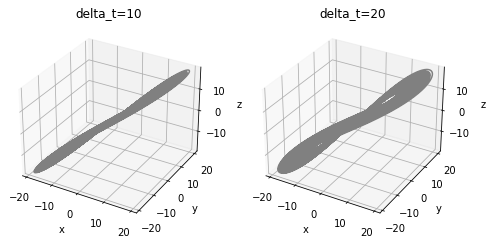

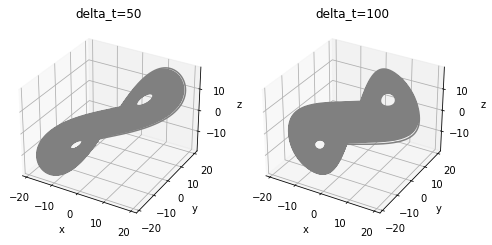

In [14]:
# draw plots for different delta_t values
draw_3d_plots('x')

In [15]:
def compute_distance_for_x():
    """
    Compute point-wise distances between two vectors. Return axis-wide differences.
    """
    # index 1 here represents the values for delta_t=20
    from scipy.spatial import distance
    x_diff = sum([distance.euclidean(lorenz_x1[1][i], lorenz_x[i]) for i in range(len(lorenz_x1[1]))])
    y_diff = sum([distance.euclidean(lorenz_x2[1][i], lorenz_y[i]) for i in range(len(lorenz_x2[1]))])
    z_diff = sum([distance.euclidean(lorenz_x3[1][i], lorenz_z[i]) for i in range(len(lorenz_x3[1]))])
    
    return x_diff, y_diff, z_diff

In [16]:
x_diff, y_diff, z_diff = compute_distance_for_x()

print(f'Sum of all distances for\nx: {x_diff}\ny: {y_diff}\nz: {z_diff}')

Sum of all distances for
x: 0.0
y: 2784484.490147044
z: 23435811.035219003


In [17]:
delta_t = [10, 20, 50, 100]
lorenz_z1, lorenz_z2, lorenz_z3 = generate_lorenz_data('z', delta_t)

In [18]:
def compute_distance_for_z():
    """
    Compute point-wise distances between two vectors. Return axis-wide differences.
    """
    # index 1 here represents the values for delta_t=20
    from scipy.spatial import distance
    x_diff = sum([distance.euclidean(lorenz_z1[1][i], lorenz_z[i]) for i in range(len(lorenz_z1[1]))])
    y_diff = sum([distance.euclidean(lorenz_z2[1][i], lorenz_y[i]) for i in range(len(lorenz_z2[1]))])
    z_diff = sum([distance.euclidean(lorenz_z3[1][i], lorenz_x[i]) for i in range(len(lorenz_z3[1]))])
    
    return x_diff, y_diff, z_diff

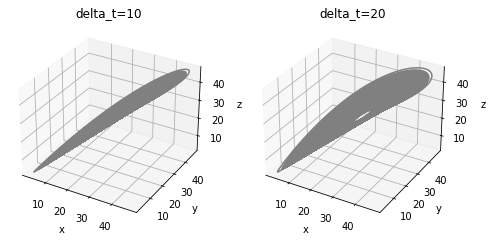

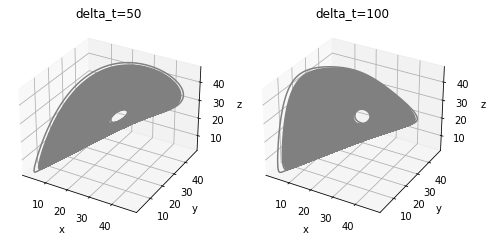

In [19]:
draw_3d_plots('z')

In [20]:
z_diff, y_diff, x_diff = compute_distance_for_z()

print(f'Sum of all distances for\nx: {x_diff}\ny: {y_diff}\nz: {z_diff}')

Sum of all distances for
x: 23428001.414384544
y: 23453342.47422192
z: 0.0
